In [1]:
import ROOT as r
import numpy as np

Welcome to JupyROOT 6.12/06


In [19]:
#fp = r.TFile("./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root")
#fp = r.TFile("./PileupCorrection_TcOver6Binning_TruncIslands_2019_07_23_09_16_40.root")
#fp = r.TFile("./PileupCorrection_TcOver6Binning_TruncIslands_2019_07_24_00_26_24.root")
fp = r.TFile("./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root")
fp.ls()

TFile**		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
 TFile*		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
  KEY: TTree	t;10	Variable Tree
  KEY: TTree	t;9	Variable Tree
  KEY: TTree	t;8	Variable Tree
  KEY: TTree	t;7	Variable Tree
  KEY: TTree	t;6	Variable Tree
  KEY: TTree	t;5	Variable Tree
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TH2D	h;4	clusters yx projection
  KEY: TH2D	h;3	clusters yx projection
  KEY: TH2D	h;2	clusters yx projection
  KEY: TH2D	h;1	clusters yx projection
  KEY: TH1D	h_y;1	clusters yx projection
  KEY: TNamed	name;1	6binning
  KEY: TNamed	fitOptions;1	R
  KEY: TH2D	rhoDouble;1	clusters yx projection
  KEY: TH2D	doublePileup;4	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;3	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;2	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;1	Double Pileup [

In [20]:
clusters = fp.Get("h").Clone()
clusters.Rebin2D(6,1)
print(clusters)
hN = clusters.Clone("hN")

<ROOT.TH2D object ("h") at 0x7fffd59e8af0>


In [21]:
t = fp.Get("t")
t.Print()

******************************************************************************
*Tree    :t         : Variable Tree                                          *
*Entries :        1 : Total =            3389 bytes  File  Size =       1176 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :iteration : iteration/F                                            *
*Entries :        1 : Total  Size=        578 bytes  File Size  =         77 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :deltat    : deltat/F                                               *
*Entries :        1 : Total  Size=        563 bytes  File Size  =         74 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [22]:
t.Draw("doublePileupOnlyScaleFactor","","goff")
print(t.GetV1()[0])
initialPileupFactor = t.GetV1()[0]

3.0517002258534376e-09


In [23]:
hD = fp.Get("doublePileup").Clone()
hD.Rebin2D(6,1)

<ROOT.TH2D object ("doublePileup") at 0x7fffd5a71860>

In [24]:
from omega_a_fitting import *
from fit_util import *
import matplotlib.pyplot as plt
import uncertainties

In [25]:
from pileup_multiplier_scan import *

In [26]:
#ding = PileupMultiplierScan(hN, hD, initialPileupFactorDouble*0.6264365817528298, hT, initialPileupFactorTriple*2.0825799737451844*1.228)
ding = PileupMultiplierScan(hN, hD, initialPileupFactor)
ding.eHigh = 3100

In [27]:
#ding.DoScan(-1,3,10,-8,8,16)
ding.DoScan(0,1,20)

[0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.6842105263157894, 0.7368421052631579, 0.7894736842105263, 0.8421052631578947, 0.894736842105263, 0.9473684210526315, 1.0] [1]
Beginning scan point:  0.0 1 ( 1 / 20 )
Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  13141.6534503654 / 4151 = 3.165900614397832
      N  =  7732543.626684525 +/- 301.3724236237244
      #tau_{#mu}  =  64.42393745203027 +/- 0.0014144745014318609
      A  =  0.3705957886476653 +/- 2.920592041456268e-05
      R  =  -47.05370401359828 +/- 0.8821563602139995
      #phi_{a}  =  5.22238442855433 +/- 0.00014482566640533357
[(7732543.626684525, 301.3724236237244), (64.42393745203027, 0.0014144745014318609), (0.3705957886476653, 2.920592041456268e-05), (-47.05370401359828, 0.8821563602139995), (5.2223844

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TFile::Append>: Replac

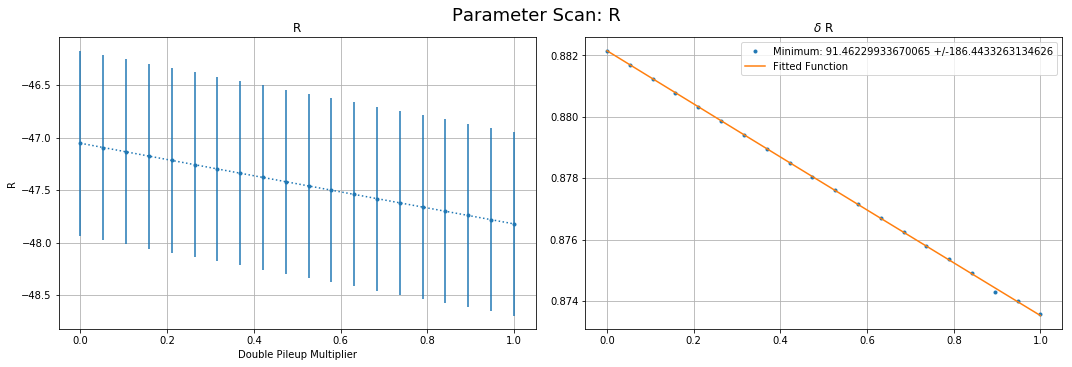

In [28]:
ding.PlotParameterVsDouble(3)

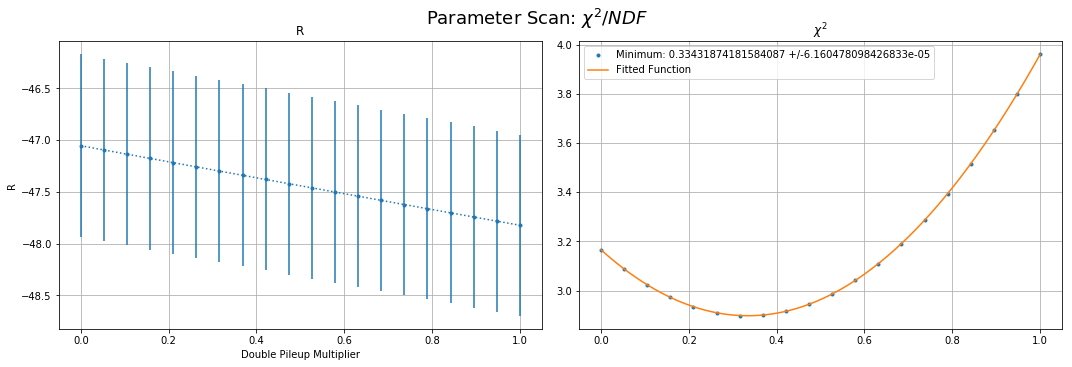

In [29]:
ding.PlotParameterVsDouble(3,r"Parameter Scan: $\chi^{2}/NDF$",0,True)

In [31]:
optimalPileup = ding.GetInflectionPoint2D(3, True)
print(optimalPileup[:1])

(0.3343187418164869+/-5.576734315961681e-05, -0.5000000000451029+/-0.00017109800130363887)
((0.3343187418164869+/-5.576734315961681e-05, -0.5000000000451029+/-0.00017109800130363887),)


Beginning scan point:  0.3343187418164869 0


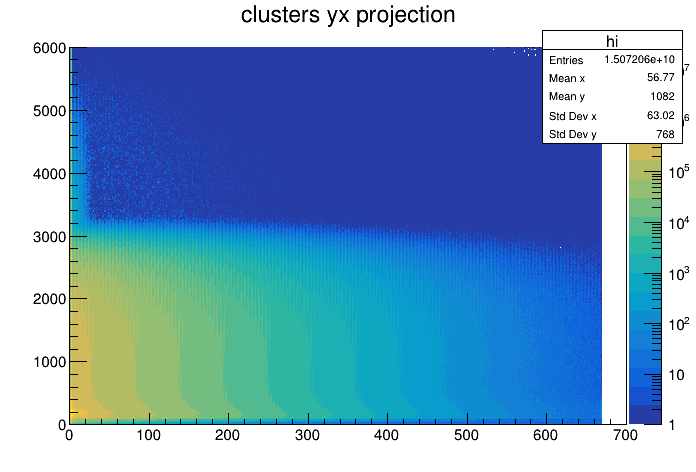

In [32]:
dong = ding.SinglePointGetWiggle(optimalPileup[0][0].n,0,True).Clone()
c = r.TCanvas()
dong.Draw("colz")
c.SetLogz()
c.Draw()

In [33]:
c.Print("PileupScanCorrected_2D_Trunc.root")

Info in <TCanvas::SaveAs>: ROOT file PileupScanCorrected_2D_Trunc.root has been created


0 <ROOT.TH1D object ("fft_-1.0_1") at 0x7f66dff3e510>
1 <ROOT.TH1D object ("fft_-0.5555555555555556_1") at 0x7f66e1ace8b0>
2 <ROOT.TH1D object ("fft_-0.11111111111111116_1") at 0x7f66d2deb600>
3 <ROOT.TH1D object ("fft_0.33333333333333326_1") at 0x7f66d2de9550>
4 <ROOT.TH1D object ("fft_0.7777777777777777_1") at 0x7f66d2dd5f80>
5 <ROOT.TH1D object ("fft_1.2222222222222223_1") at 0x7f66d2da1ff0>
6 <ROOT.TH1D object ("fft_1.6666666666666665_1") at 0x7f66d2dec830>
7 <ROOT.TH1D object ("fft_2.1111111111111107_1") at 0x7f66d2df4670>
8 <ROOT.TH1D object ("fft_2.5555555555555554_1") at 0x7f66d2dec420>
9 <ROOT.TH1D object ("fft_3.0_1") at 0x7f66d2d22fb0>
10 <ROOT.TH1D object ("fft_0.0_1") at 0x7f66d17f5480>
11 <ROOT.TH1D object ("fft_0.05263157894736842_1") at 0x7f66d17d0800>
12 <ROOT.TH1D object ("fft_0.10526315789473684_1") at 0x7f66d2078830>
13 <ROOT.TH1D object ("fft_0.15789473684210525_1") at 0x7f66d17dbd80>
14 <ROOT.TH1D object ("fft_0.21052631578947367_1") at 0x7f66d1946740>
15 <ROOT.TH

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>:

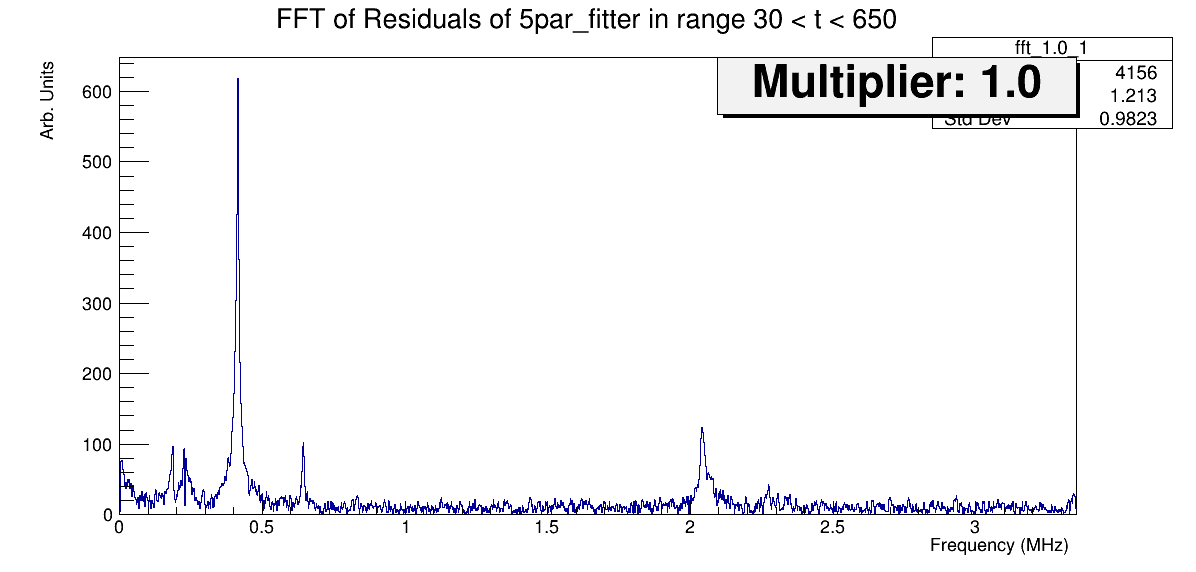

In [22]:
for i, hi in enumerate(ding.ffts):
    print(i, hi)
    c  = r.TCanvas("c","c",1200,600)
    c.cd(i+1)
    hi.Draw("hist")
    text = r.TPaveText(0.6,0.8,0.9,0.9,"ndc")
    text.AddText("Multiplier: "+str(round(ding.multipliers[i][0], 5) ))
    text.Draw()
    c.Draw()
    #c.Print("./images/FFT_PileupMultiplierScan_Trunc_"+str(i).zfill(5)+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


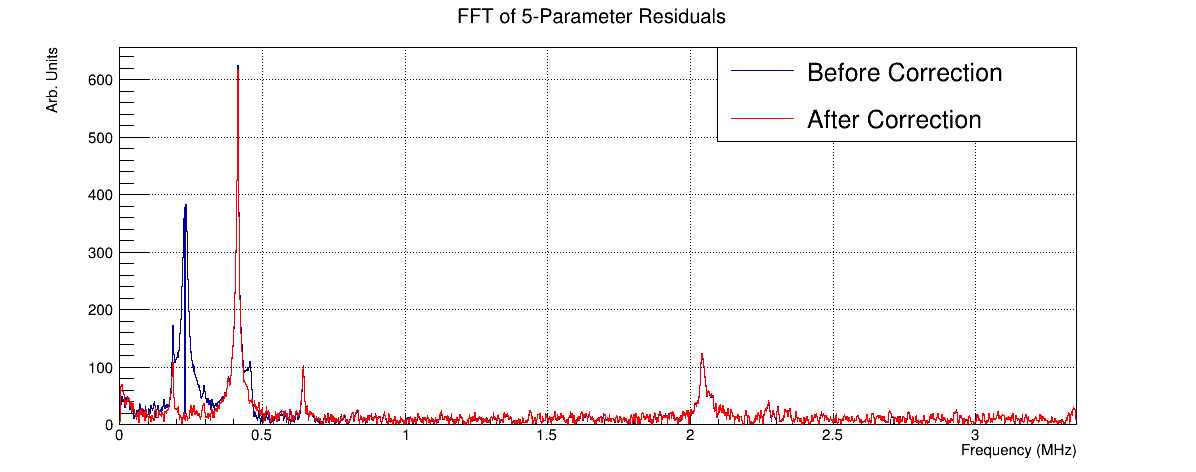

In [36]:
c  = r.TCanvas("c","c",1200,500)
r.gStyle.SetOptStat(0)
ding.ffts[0].Draw("hist")
ding.ffts[0].SetTitle("FFT of 5-Parameter Residuals")

ffti = 23
ding.ffts[ffti].Draw("hist same")
ding.ffts[ffti].SetLineColor(2)

leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(ding.ffts[0], "Before Correction", "l")
leg.AddEntry(ding.ffts[ffti], "After Correction", "l")
leg.Draw()

c.SetGrid()
c.Draw()